<a href="https://colab.research.google.com/github/arbin34/heruko/blob/main/spamnonspam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("/content/spam[1].csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.rename(columns={'v1':'target','v2':'text'} ,inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
lebel=LabelEncoder()
df['target']=lebel.fit_transform(df['target'])

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df["number_characters"]=df['text'].apply(len)

In [ ]:
df["num_words"]=df['text'].apply(lambda x:len(nltk.word_tokenize(x)));
df["num_sent"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,number_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

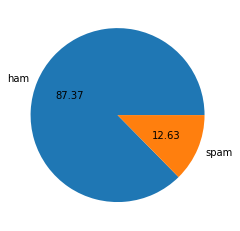

In [ ]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
df[['number_characters','num_words','num_sent']].describe()

,number_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
df[df['target']==1][['number_characters','num_words','num_sent']].describe()

,number_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [ ]:
import string
from nltk. corpus import stopwords

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

text cannot copy in y if u clear the y automatic text will deleted to resolve the problem we have to cloning y[:] is needed
" ".join() is used to return spring

In [ ]:
def tranform_text(text):
  text=text.lower();
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i);
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
      y.append(ps.stem(i))
  return " ".join(y)


In [ ]:
tranform_text("my name is verman kumar playing ")

'name verman kumar play'

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
ps.stem("playing")

'play'

In [ ]:
df['transform_text']=df['text'].apply(tranform_text)
df.head()

,target,text,number_characters,num_words,num_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=800,height=800,min_font_size=7,background_color='white')


In [ ]:
spam_w=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=""))

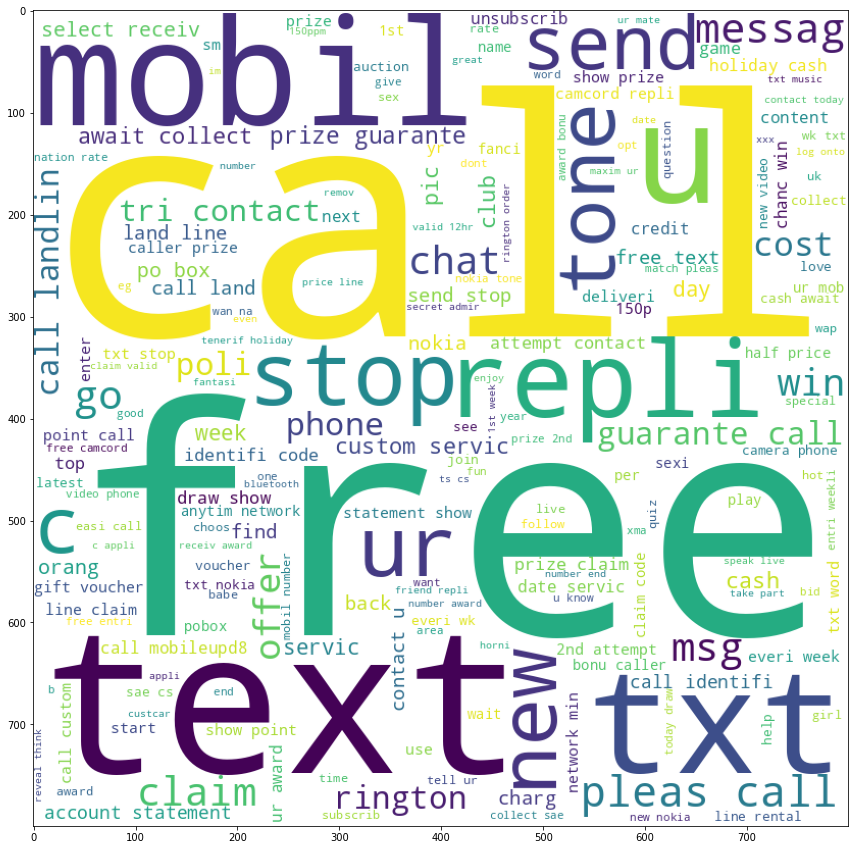

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(spam_w)

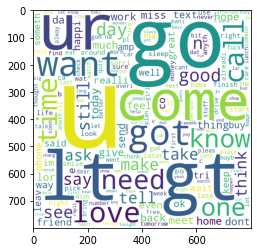

In [ ]:
ham_w=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=""))
plt.imshow(ham_w)

In [ ]:
spam_corpus=[]
for msg in df[df["target"]==1]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


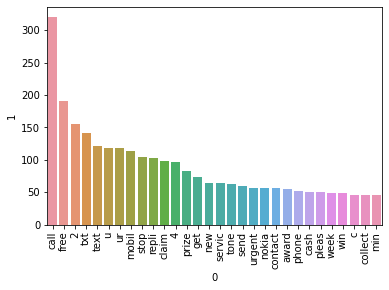

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


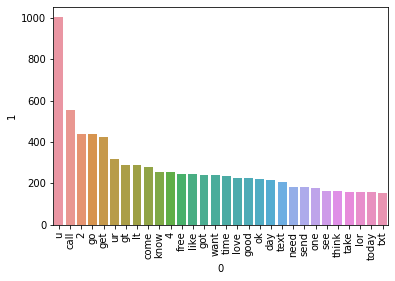

In [ ]:
ham_corpus=[]
for msg in df[df["target"]==0]['transform_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
df.info()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv=CountVectorizer()
tfid=TfidfTransformer()


In [ ]:
x=cv.fit_transform(df['transform_text']).toarray()

In [ ]:
y=df['target'].ravel()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gb=GaussianNB()
mb=MultinomialNB()
b=BernoulliNB()

In [ ]:
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(precision_score(y_pred,y_test))

0.8655705996131529
[[787  16]
 [123 108]]
0.8709677419354839


In [ ]:
mb.fit(x_train,y_train)
y_pred1=mb.predict(x_test)
print(accuracy_score(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))
print(precision_score(y_pred1,y_test))

0.9748549323017408
[[894  10]
 [ 16 114]]
0.9193548387096774


In [ ]:
b.fit(x_train,y_train)
y_pred2=b.predict(x_test)
print(accuracy_score(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))
print(precision_score(y_pred2,y_test))

0.9709864603481625
[[903  23]
 [  7 101]]
0.8145161290322581


In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB;
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
rm=RandomForestClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gd=GradientBoostingClassifier(n_estimators=50,random_state=2)
mn=MultinomialNB()
bn=BernoulliNB()
svc=SVC(kernel="sigmoid",gamma=0.1)
dtc=DecisionTreeClassifier(max_depth=5)
knn=KNeighborsClassifier()
lr=LinearRegression()

In [ ]:
clf={
    'lr': LinearRegression(),
    'rm':RandomForestClassifier(),
     'etc':ExtraTreesClassifier(),
    'rm':RandomForestClassifier(),
    'etc':ExtraTreesClassifier(),
   'gd':GradientBoostingClassifier(),
   'mn':MultinomialNB(),
   'bn':BernoulliNB(),
   'dtc':DecisionTreeClassifier(),
  'knn':KNeighborsClassifier(),
  'svc':SVC()
}

In [ ]:
def check(clf,x_train,y_train,x_test,y_test):
   clf.fit(x_train,y_train)
   y_pred=clf.predict(x_test).round()
   accuracy=accuracy_score(y_test,y_pred)
   precision=precision_score(y_test,y_pred,pos_label='positive',average='micro')

   return accuracy,precision



In [ ]:
check(rm,x_train,y_train,x_test,y_test)

In [ ]:
accuracy_scores=[]
precision_scores=[]
for name,clfs in clf.items():
   current_accuracy=check(clfs,x_train,y_train,x_test,y_test)
   current_precision=check(clfs,x_train,y_train,x_test,y_test)
   print(" ",name)
   print(' ',current_accuracy)
   print(' ',current_precision)
   accuracy_scores.append(current_accuracy)
   precision_scores.append(current_precision)



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


  lr
  (0.39361702127659576, 0.39361702127659576)
  (0.39361702127659576, 0.39361702127659576)


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


  rm
  (0.9738878143133463, 0.9738878143133463)
  (0.9729206963249516, 0.9729206963249516)


KeyboardInterrupt: ignored

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clfs in clf.items():

    current_accuracy,current_precision = check(clfs, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  lr
Accuracy -  0.39361702127659576
Precision -  0.39361702127659576


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  rm
Accuracy -  0.9729206963249516
Precision -  0.9729206963249516


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  etc
Accuracy -  0.9758220502901354
Precision -  0.9758220502901354


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  gd
Accuracy -  0.9593810444874274
Precision -  0.9593810444874274


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  mn
Accuracy -  0.9642166344294004
Precision -  0.9642166344294004


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  bn
Accuracy -  0.9700193423597679
Precision -  0.9700193423597679


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  dtc
Accuracy -  0.9593810444874274
Precision -  0.9593810444874274


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


For  knn
Accuracy -  0.90715667311412
Precision -  0.90715667311412
For  svc
Accuracy -  0.9709864603481625
Precision -  0.9709864603481625


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
data=pd.DataFrame({'Algorithm':clf.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
data

,Algorthms,Accuracy,Precision
0,lr,"(0.39361702127659576, 0.39361702127659576)","(0.39361702127659576, 0.39361702127659576)"
1,rm,"(0.971953578336557, 0.971953578336557)","(0.9758220502901354, 0.9758220502901354)"
2,etc,"(0.9787234042553191, 0.9787234042553191)","(0.9758220502901354, 0.9758220502901354)"
3,gd,"(0.960348162475822, 0.960348162475822)","(0.9574468085106383, 0.9574468085106383)"
4,mn,"(0.9642166344294004, 0.9642166344294004)","(0.9642166344294004, 0.9642166344294004)"
5,bn,"(0.9700193423597679, 0.9700193423597679)","(0.9700193423597679, 0.9700193423597679)"
6,dtc,"(0.960348162475822, 0.960348162475822)","(0.9584139264990329, 0.9584139264990329)"
7,knn,"(0.90715667311412, 0.90715667311412)","(0.90715667311412, 0.90715667311412)"
8,svc,"(0.9709864603481625, 0.9709864603481625)","(0.9709864603481625, 0.9709864603481625)"
